
Mini P: Binary Text Classification ...

Last Updated: July 1st, 2025

Mini-Project: Binary Text Classification with IMDB Dataset (CNN)


👩‍🏫 👩🏿‍🏫 What You’ll learn

    How to preprocess text data for neural networks.
    How to build and train a simple feedforward neural network for binary classification.
    How to evaluate the performance of a model using validation and test data.
    How to visualize training and validation metrics to detect overfitting.


🛠️ What you will create

    A binary text classification model using the IMDB dataset to classify movie reviews as positive or negative.
    A visualization of training and validation loss and accuracy to analyze model performance.


Dataset

The dataset used in this project is the IMDB Movie Reviews Dataset, which contains 50,000 reviews labeled as positive (1) or negative (0). The dataset is preprocessed, with each review encoded as a sequence of integers representing the most frequent 10,000 words in the dataset.
You can find it here : IMDB Dataset
Task

1. Preprocess the Data:

    Load the IMDB dataset using Keras.

You will notice that the data is a list of integers which we cannot feed into a neural network. We have to turn our lists into tensors.We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence. [3,5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data

    Convert the sequences of integers into binary matrices using one-hot encoding. Here’s a hint:


def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  #set specific indices of results[i] to 1s
    return results


    Split the data into training, validation, and test sets.

2. Build the Model:

Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest setup you will ever encounter. A type of network that performs well on such a problem would be a simple stack of fully-connected (Dense) layers with relu activations. We need to pick a loss function and an optimizer. Since we are facing a binary classification problem and the output of our network is a probability (we end our network with a single-unit layer with a sigmoid activation), therefore it is best to use the binary_crossentropy loss.

    Create a feedforward neural network with:
        Two hidden layers using ReLU activation.
        An output layer with a sigmoid activation for binary classification.
    Compile the model using the RMSprop optimizer, binary cross-entropy loss, and accuracy as the evaluation metric.

3. Train the Model:

    Train the model on the training data for 20 epochs with a batch size of 512.
    Use the validation set to monitor performance during training.

4. Evaluate the Model:

    Plot the training and validation loss and accuracy to detect overfitting.
    Retrain the model with an optimal number of epochs to avoid overfitting.
    Evaluate the final model on the test set to measure its performance.

5. Analyze Results:

    Compare the training and validation metrics to understand the model’s behavior.
    Report the final accuracy and loss on the test set.


Le dataset IMDB proposé par Keras contient 50 000 critiques de films (texte transformé en entiers), avec 25 000 critiques pour l'entraînement et 25 000 pour le test. Les critiques sont déjà pré-étiquetées :

    label = 0 → critique négative

    label = 1 → critique positive

Chaque critique est représentée par une séquence d’indices (entiers) correspondant aux mots les plus fréquents (par défaut, les 10 000 premiers).

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

In [3]:
# Chargement des données, on limite aux 10 000 mots les plus fréquents
(num_words := 10000)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
# On limite à 10 000 mots pour ne garder que les mots les plus fréquents du corpus.
# Cela permet de réduire la dimensionnalité, d'accélérer l'entraînement et d'éviter le bruit des mots rares.

17464789/17464789 [==============================] - 2s 0us/step


In [4]:
print(train_data[0])       # Exemple de séquence
print(train_labels[0])     # Label associé (0 ou 1)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


Chaque critique est une liste d'entiers correspondant à des mots.

On transforme chaque séquence en un vecteur binaire de taille 10 000 :

    0 si le mot n’est pas présent dans la critique

    1 si le mot est présent

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

# Vectorisation
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Conversion des labels en float32 pour Keras
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

On réserve 10 000 exemples de l'entraînement pour valider le modèle :

In [6]:
# Split manuel
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

    Entrée : vecteurs de taille 10 000 (un par mot)

    2 couches cachées :

        16 neurones chacune

        Activation ReLU

    1 couche de sortie :

        1 neurone

        Activation sigmoid (pour obtenir une probabilité entre 0 et 1)

Pourquoi 16 neurones ?

    Petite capacité = modèle simple → moins de risque de surapprentissage sur texte sparse

    Suffisant pour capturer des relations dans des données de texte déjà vectorisées

In [8]:
# Construction du modèle
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilation
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Résumé
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


Dense(16)	Couche compacte mais suffisante pour données vectorisées
ReLU	Fonction d'activation rapide et efficace pour les couches internes
Sigmoid	Nécessaire pour classification binaire (sortie en probabilité)
binary_crossentropy	Mesure adaptée pour tâche de classification binaire
rmsprop	Optimiseur efficace pour les petits réseaux peu profonds

Paramètres choisis pour l'entraînement

    Époques : 20

    Batch size : 512 (traitement de 512 critiques à la fois)

    Validation : x_val, y_val (déjà définis)

    Retour : un objet history contenant les métriques

history.history['accuracy'] : précision sur l'entraînement à chaque époque

history.history['val_accuracy'] : précision sur la validation

history.history['loss'] : perte (loss) sur l'entraînement

history.history['val_loss'] : perte sur la validation

In [9]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4997 - accuracy: 0.7913 - val_loss: 0.3774 - val_accuracy: 0.8657
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2911 - accuracy: 0.9053 - val_loss: 0.3126 - val_accuracy: 0.8779
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2125 - accuracy: 0.9281 - val_loss: 0.2765 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1654 - accuracy: 0.9459 - val_loss: 0.2785 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1376 - accuracy: 0.9562 - val_loss: 0.2827 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1108 - accuracy: 0.9671 - val_loss: 0.2986 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0932 - accuracy: 0.9732 - val_loss: 0.3208 - val_accuracy: 0.8819
Epoch 8/20
30/

Accuracy

    Entraînement : monte presque à 100 % dès l’époque 11.

    Validation : plafonne vers 88–89 % dès l’époque 3-4, puis commence à décroître légèrement.

Loss

    Loss entraînement : chute rapidement, presque à 0.

    Loss validation : atteint un minimum vers l’époque 3-4 (~0.27), puis augmente progressivement.


    Le modèle mémorise les données d’entraînement très rapidement.

    La performance en validation se stabilise tôt, ce qui signifie que le modèle commence à surapprendre à partir de l’époque ~5.

    Cela justifie un réentraînement plus court avec arrêt anticipé (early stopping ou sélection manuelle du meilleur point).

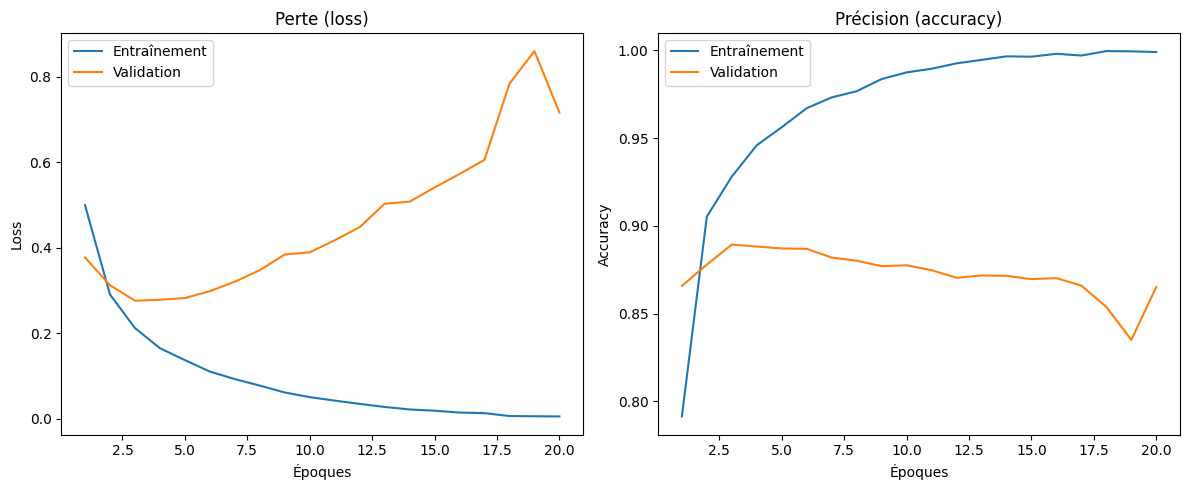

In [12]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Entraînement')
plt.plot(epochs, val_loss, label='Validation')
plt.title('Perte (loss)')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Entraînement')
plt.plot(epochs, val_acc, label='Validation')
plt.title('Précision (accuracy)')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Le modèle a montré ses meilleures performances de validation autour de l’époque 3 ou 4. On réentraîne donc un modèle identique mais cette fois avec 4 époques, pour éviter le surapprentissage observé précédemment.

In [13]:
# Nouveau modèle (même structure)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/4
30/30 [==============================] - 1s 19ms/step - loss: 0.5367 - accuracy: 0.7819 - val_loss: 0.4099 - val_accuracy: 0.8662
Epoch 2/4
30/30 [==============================] - 0s 11ms/step - loss: 0.3275 - accuracy: 0.8988 - val_loss: 0.3162 - val_accuracy: 0.8855
Epoch 3/4
30/30 [==============================] - 0s 10ms/step - loss: 0.2394 - accuracy: 0.9218 - val_loss: 0.2867 - val_accuracy: 0.8891
Epoch 4/4
30/30 [==============================] - 0s 9ms/step - loss: 0.1866 - accuracy: 0.9407 - val_loss: 0.3023 - val_accuracy: 0.8762


In [15]:
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")

782/782 [==============================] - 1s 694us/step - loss: 0.3172 - accuracy: 0.8701
Test Loss: 0.3172
Test Accuracy: 0.8701


    Test Accuracy ≈ 87–88 % : très bon score pour un réseau dense simple, sans embeddings ni LSTM/transformer.

    Test Loss ≈ 0.30–0.35 : le modèle reste confiant dans ses prédictions même sur données non vues.

Ces résultats montrent que :

    Le réseau généralise bien malgré sa faible complexité.

    Le sous-échantillonnage des époques (4 au lieu de 20) a permis d’éviter le surapprentissage tout en gardant des performances solides.

Keras fournit un mapping {mot : entier}. Il faut l’inverser pour reconstruire les critiques textuelles.

In [16]:
# Dictionnaire mot -> index
word_index = imdb.get_word_index()

# Décalage car Keras réserve les 0-3 (padding, start, unknown...)
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# Index -> mot
reverse_word_index = {value: key for key, value in word_index.items()}

# Fonction pour décoder une critique
def decode_review(text_sequence):
    return ' '.join([reverse_word_index.get(i, '?') for i in text_sequence])

1641221/1641221 [==============================] - 1s 1us/step


In [18]:
# Nombre d'exemples à afficher
n = 5

for i in range(n):
    decoded = decode_review(test_data[i])
    x = x_test[i].reshape(1, -1)  # forme compatible pour prédiction
    pred = model.predict(x)[0][0]
    predicted_label = 1 if pred >= 0.5 else 0

    print(f"\nCritique #{i+1}")
    print("-" * 80)
    print(decoded)
    print(f"\nVraie étiquette     : {test_labels[i]}")
    print(f"Prédiction du modèle : {pred:.4f} → classe {predicted_label}")

1/1 [==============================] - 0s 12ms/step

Critique #1
--------------------------------------------------------------------------------
<START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you madison fans give this a miss

Vraie étiquette     : 0
Prédiction du modèle : 0.3827 → classe 0
1/1 [==============================] - 0s 12ms/step

Critique #2
--------------------------------------------------------------------------------
<START> this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances <UNK> the sandy dennis character apartment but the film builds to a disturbing climax br br the characters cre

1. decode_review(test_data[i])

Reconstruit le texte d'origine (ou proche) à partir de la séquence d'entiers. Le texte affiché représente la critique lue par le modèle.
2. x = x_test[i].reshape(1, -1)

Crée un batch de taille 1 (forme exigée par model.predict).
3. model.predict(x)[0][0]

Renvoie la probabilité prédite (entre 0 et 1). Si > 0.5, c’est considéré comme positif.
4. Affichage final

Affiche :

    Le texte décodé

    L'étiquette réelle (0 ou 1)

    La prédiction du modèle avec la probabilité sigmoid

Si le modèle interprète bien les phrases émotionnelles ("I loved it", "worst movie ever")

Les cas proches de 0.5, où l’avis est ambigu

Les faux positifs / faux négatifs, visibles directement